# 2D Design

### Overview

The purpose of this project was for us to apply what we have learnt in this course. This includes working with data and visualizing it, create model of linear regression, as well as using metrics to measure the accuracy of our model.

Please find the project handout description in the following [link](https://edimension.sutd.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_5261_1&content_id=_184406_1).


### Deliverables

We have submitted this Jupyter notebook together with the dataset into Vocareum. This notebook was made based on a template to work on this project.

### Students Submission

Student's Names:
- Loke Jing Yang (1008156)
- Nadine Verelia Moiras (1008481)
- Valerie Lim Li Ting (1008199)
- Beatriz Acosta Ong (1008239)
- Mariano Guillermo Vicente Perdices (1008005)

### Problem Statement:
***How might we develop a robust model to better understand the factors correlated to the Food Security Index (FSI), using economic, health, and agricultural indicators?***

This approach seeks to identify key drivers of the FSI and assess their impacts, enabling policymakers to make informed decisions to improve food security outcomes globally.

### Import Statements

In [ ]:
import numpy as np  # For numerical operations and array manipulation
import pandas as pd  # For data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # For creating static visualizations (e.g., plots, charts)
import seaborn as sns  # For advanced data visualization, building on Matplotlib
from IPython.display import display  # For displaying rich output, like DataFrames, in Jupyter Notebooks

from typing import TypeAlias, Optional, AnyStr, Any  # For type annotations to improve code readability and type safety
Number: TypeAlias = int | float  # Alias for type hinting numbers as either integers or floats

### Datasets Checklist

✅ Describe your dataset.

✅ Put the link to the sources of your raw dataset.

✅ Put python codes for loading the data into pandas dataframe(s). The data should be the raw data downloaded from the source. No pre-processing using any software (excel, python, etc) yet. Include this dataset in your submission

✅ Explain each column of your dataset (can use comment or markdown)

✅ State which column is the dependent variable (target) and explain how it is related to your problem statement

✅ State which columns are the independent variables (features) and describe your hypothesis on why these features can predict the target variable

####Data Set 1: Global Food Security Index
A comprehensive tool developed by *Economist Impact*, with support from *Corteva Agriscience*, to measure and track food security across countries. Launched in 2012, the GFSI provides insights into the underlying factors affecting food security and offers a framework for assessing countries' performance and vulnerabilities.

**Key Features of the GFSI**
The index evaluates food security across four main pillars:

  - (i) Affordability: Economic access to food, including food prices, policies, and support for low-income households.
  - (ii) Availability: Supply-side aspects like agricultural production, infrastructure, and food loss.
  - (iii and iv) Quality and Safety: Nutritional standards, food safety, and dietary diversity.

Extra Features:
  - Sustainability and Adaptation: Environmental resilience, natural resources, and climate adaptability (added in 2017).
  - Global Coverage: The GFSI covers 113 countries and ranks them based on over 60 indicators. These indicators incorporate factors like GDP, climate risks, agricultural inputs, and social safety nets.

Link: https://impact.economist.com/sustainability/project/food-security-index/download-the-index

**Note:** Since we cannot automatically extract the data from the FSI file due to the need of registration as well as macros in the excel sheet, we manually extracted the data into the csv attached with this notebook.

If you would like to verify the data extracted, follow these steps:
1. Open the FSI excel file
2. Click on DATASET -> DATA TABLE
3. Change year to 2021
4. Scroll all the way to the bottom until you see "BG) BACKGROUND INDICATORS"

Meanwhile the FSI scores are in the SCORE TABLE at the top.

**Extra Note:** We chose to extract background indicators because, according to the sheet, these indicators are not included into the calculations for a country's FSI. Hence we will be making use of these to construct our model.

In [ ]:
# Load raw data: Global Food Security Index.csv
gfsi: pd.DataFrame = pd.read_csv('Global Food Security Index.csv')

# Print dataframe to see if data was imported correctly
display(gfsi)

# Show basic information about dataset
gfsi.describe()

,Country Code,Countries,Food Security Index,Prevalence of undernourishment,Percentage of children stunted,Percentage of children underweight,Prevalence of severe food insecurity,Prevalence of moderate or severe food insecurity,Human Development Index,EIU Democracy Index,Prevalence of Obesity
0,DZA,Algeria,62.5,2.5,9.3,2.7,7.0,17.6,0.75,4,34.0
1,AGO,Angola,45.5,17.3,37.7,19.0,27.0,73.5,0.58,4,10.0
2,ARG,Argentina,64.7,3.9,7.8,1.7,13.0,35.8,0.84,7,29.6
3,AUS,Australia,70.7,2.5,2.1,0.2,3.0,12.3,0.94,9,30.7
4,AUT,Austria,77.7,2.5,NaN,NaN,1.0,3.0,0.92,8,23.4
...,...,...,...,...,...,...,...,...,...,...,...
108,UZB,Uzbekistan,54.5,2.5,9.9,2.9,4.0,19.7,0.72,2,17.7
109,VEN,Venezuela,44.0,27.4,10.6,2.9,NaN,NaN,0.71,3,28.3
110,VNM,Vietnam,62.7,6.7,22.3,13.4,0.0,6.5,0.70,3,2.6
111,YEM,Yemen,39.8,45.4,37.2,39.9,NaN,NaN,0.47,2,18.2


,Food Security Index,Prevalence of undernourishment,Percentage of children stunted,Percentage of children underweight,Prevalence of severe food insecurity,Prevalence of moderate or severe food insecurity,Human Development Index,EIU Democracy Index,Prevalence of Obesity
count,113.000000,103.000000,94.000000,93.000000,80.000000,80.000000,113.000000,113.000000,113.000000
mean,62.181416,9.426214,18.525532,10.166667,9.512500,26.968750,0.727965,5.495575,21.032743
std,12.456156,10.386463,13.083010,9.338971,11.599862,23.186921,0.161401,2.303429,11.000596
min,36.200000,2.500000,1.600000,0.200000,0.000000,2.000000,0.390000,1.000000,2.600000
25%,51.800000,2.500000,6.425000,2.600000,1.000000,6.425000,0.580000,3.000000,10.000000
50%,64.300000,5.300000,15.950000,7.100000,4.000000,18.300000,0.760000,6.000000,23.800000
75%,72.800000,12.350000,29.825000,16.300000,14.250000,45.975000,0.850000,7.000000,28.700000
max,82.700000,46.800000,57.600000,39.900000,51.000000,83.900000,0.960000,10.000000,43.900000


##### Column Description:
  - **Country Code**: Global standard to avoid different naming conventions from other datasets.
  - **Countries**: List of Countries available from the Food Security Index.
  - **Food Security Index**: Measures the ability of consumers to purchase food, their vulnerability to price shocks and the presence of programmes and policies to support consumers when shocks occur.
  - **Prevalence of undernourishment**: The proportion of the population who do not receive the minimum number of required calories for an average person, as defined by the FAO/WHO/UNU Expert Consultation in 2001.
  - **Percentage of children stunted**: The percentage of children under five years who have a height-for-age below minus two standard deviations of the National Center for Health Statistics (NCHS)/WHO reference median.
  - **Percentage of children underweight**: The percentage of children under five years who have a weight-for-age below minus two standard deviations of the NCHS/ WHO reference median.
  - **Prevalence of severe food insecurity**: An estimate of the percentage of people in the population who live in households classified as severely food insecure. A household is classified as severely food insecure when at least one adult in the household has reported to have been forced to reduce the quantity of the food, to have skipped meals, having gone hungry, or having to go for a whole day without eating because of a lack of money or other resources.
  - **Prevalence of moderate or severe food insecurity**: An estimate of the percentage of people in the population who live in households classified as moderately or severely food insecure. A household is classified as moderately or severely food insecure when at least one adult in the household has reported to have low quality diets and might have been forced to also reduce the quantity of food they would normally eat because of a lack of money or other resources.
  - **Human Development Index**: A composite index that measures development by combining indicators on life expectancy, educational attainment, and income.
  - **EIU Democracy Index**: The Democracy Index provides a snapshot of the state of democracy in 165 states and 2 territories. The index includes indicators in the following 5 categories: Electoral process and pluralism, Functioning of government, Political participation, Political culture, and Civil liberties.
  - **Prevalence of Obesity**: Measures the percentage of the population, over 18 years of age, that is obese. Obesity is defined as having an age-standardized body mass index (BMI) greater than 30.0.

  Source: https://impact.economist.com/sustainability/project/food-security-index/

##### Initial Findings for FSI Dataset:
Many countries are missing data as seen by the count:
1. "*Prevalence of undernourishment*",
2. "*Percentage of children stunted*",
3. "*Percentage of children underweight*",
4. "*Prevalence of severe food insecurity*", and
5. "*Prevalence of moderate or severe food insecurity*"

Later on we will be removing the countries with missing data fields

####Data Set 2: Agriculture, forestry, and fishing (% of GDP)
Agriculture, forestry, and fishing corresponds to ISIC divisions 1-3 and includes forestry, hunting, and fishing, as well as cultivation of crops and livestock production. Value added is the net output of a sector after adding up all outputs and subtracting intermediate inputs. It is calculated without making deductions for depreciation of fabricated assets or depletion and degradation of natural resources. The origin of value added is determined by the International Standard Industrial Classification (ISIC), revision 4. Note: For VAB countries, gross value added at factor cost is used as the denominator.

Link: https://api.worldbank.org/v2/en/indicator/NV.AGR.TOTL.ZS?downloadformat=excel

In [ ]:
# Import world bank data from online source
# Note: header = 3 is used to remove the first 3 rows since all datasets from World Bank include 3 rows we don't need
worldb: pd.DataFrame = pd.read_excel('https://api.worldbank.org/v2/en/indicator/NV.AGR.TOTL.ZS?downloadformat=excel', sheet_name='Data', header=3)

# Print dataframe to see if data was imported correctly
display(worldb)

# Show basic information about dataset
worldb.describe()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014813,0.012520,0.018612,0.023919,0.022253,0.027573,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.958331,12.850750,12.994822,12.643375,11.913567,12.632486,14.643340,13.402833,13.891834,14.667492
2,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.137041,20.634323,25.740314,26.420199,22.042897,25.773971,29.975583,33.597619,33.701432,NaN
3,Africa Western and Central,AFW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.223689,20.242095,20.527083,20.383873,20.464235,20.637680,22.340513,21.567748,21.866302,21.302691
4,Angola,AGO,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.547057,9.122534,9.831169,10.016996,8.607742,7.882625,9.946544,11.486345,13.737788,14.920040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.298706,7.677168,8.171523,7.408720,6.531164,7.238670,7.362010,6.923306,7.392605,7.770516
262,"Yemen, Rep.",YEM,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.676574,20.205937,25.090913,26.961066,28.745140,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,9.041447,9.317147,8.958631,8.83529,7.646370,7.434387,...,2.125749,2.233978,2.414186,2.493799,2.260704,1.950321,2.582420,2.557299,2.830275,2.526921
264,Zambia,ZMB,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,11.460629,12.761592,12.345425,13.01928,11.980939,14.313984,...,6.779598,4.980837,6.228472,4.024271,3.341124,2.860775,2.972634,3.000881,3.093948,2.791978


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,53.000000,55.000000,56.000000,59.000000,60.000000,75.000000,79.000000,80.000000,84.000000,85.000000,...,247.000000,247.000000,247.000000,246.000000,245.000000,244.000000,241.000000,240.000000,229.000000,194.000000
mean,32.707645,35.176906,34.859608,34.619490,33.412466,32.140317,30.528365,30.250737,28.482845,27.353641,...,10.243692,10.278266,10.178961,10.178206,9.896351,9.690161,10.416858,10.164412,10.145830,10.384001
std,16.748234,16.832746,16.254938,16.041516,15.727735,15.595078,15.276679,14.891664,15.136757,15.012466,...,9.525269,9.602446,9.608366,9.794399,9.538219,9.425552,9.692545,9.603867,9.653408,9.771276
min,3.703532,3.511770,3.589926,3.250267,3.331872,3.070117,3.271362,3.044935,3.049675,2.812272,...,0.014813,0.012520,0.013624,0.020479,0.016407,0.015277,0.014101,0.016625,0.026527,0.029066
25%,23.286753,25.384405,24.427743,24.441266,23.751747,23.342833,21.064183,21.385975,17.250840,16.001054,...,2.641991,2.439177,2.321426,2.385080,2.370478,2.125437,2.582420,2.285653,2.590909,2.934793
50%,29.448958,34.073102,35.324711,35.123653,33.158259,31.313079,29.993908,30.017149,28.080241,26.790857,...,7.404400,7.408892,6.811151,6.886250,6.750073,6.824001,7.583973,7.187403,7.236637,7.512406
75%,43.189201,42.463832,41.551777,43.411740,41.984962,40.476641,38.991013,39.984619,39.032540,37.519111,...,16.324411,16.268025,16.430316,16.130017,16.031631,16.146398,16.948964,16.331030,16.497666,16.099778
max,88.184615,89.414510,88.184950,83.781250,81.714286,79.286224,74.866920,70.706326,69.168207,66.424547,...,51.792291,58.756137,57.746738,60.609881,58.934413,58.154471,59.487396,57.448787,60.446113,64.354179


##### Column Description:
  - **Country Code**: Each country's respective code
  - **1960 - 2023**: Data of the respective years regarding Agriculture, forestry, and fishing (% of GDP)

##### Initial Findings:
We notice that the dataset contains data from 1960 - 2023. As mentioned in our Modelling Uncertainty Report, we are only interested in the data for 2021 to model post-pandemic values. There are also missing data in the year 2021 so we will handle them accordingly by removing the countries with missing data.

#### Variables (From Both Datasets):
- **Independent:**
  *   *Percentage of children stunted* (FSI DATASET)
  *   *Prevalence of moderate or severe food insecurity* (FSI DATASET)
  *   *Agriculture, forestry, and fishing (% of GDP)* (WORLD BANK DATASET)

- **Dependent:**
  * *Food Security Index* (FSI DATASET)

### Clean & Analyze your data
Using python code to:
- Clean the data
- Calculate Descriptive Statistics and other statistical analysis
- Visualization with meaningful analysis description

In [ ]:
# Clean Global Food Security Index data
# gfsi.dropna() removes all rows with NaN values
gfsi_clean = gfsi.dropna()

# Reset the index after dropping empty rows
gfsi_clean.reset_index(drop=True, inplace=True)

# Clean World Bank data
# Filtering the data so we only have useful information such as 'Country Code', and '2021'
worldb_clean = worldb.filter(['Country Code','2021'])

# worldb.dropna() removes all rows with NaN values
worldb_clean = worldb_clean.dropna()

# Reset the index after dropping empty rows
worldb_clean.reset_index(drop=True, inplace=True)

# Double check to see if everything is okay
display(gfsi_clean)
display(worldb_clean)

,Country Code,Countries,Food Security Index,Prevalence of undernourishment,Percentage of children stunted,Percentage of children underweight,Prevalence of severe food insecurity,Prevalence of moderate or severe food insecurity,Human Development Index,EIU Democracy Index,Prevalence of Obesity
0,DZA,Algeria,62.5,2.5,9.3,2.7,7.0,17.6,0.75,4,34.0
1,AGO,Angola,45.5,17.3,37.7,19.0,27.0,73.5,0.58,4,10.0
2,ARG,Argentina,64.7,3.9,7.8,1.7,13.0,35.8,0.84,7,29.6
3,AUS,Australia,70.7,2.5,2.1,0.2,3.0,12.3,0.94,9,30.7
4,AZE,Azerbaijan,60.8,2.5,16.3,4.9,0.0,8.9,0.76,3,23.9
5,BGD,Bangladesh,53.6,9.7,30.2,22.6,10.0,31.9,0.63,6,4.6
6,BEL,Belgium,74.5,2.5,2.3,1.0,1.0,3.7,0.93,8,25.1
7,BWA,Botswana,54.7,29.3,22.8,11.8,22.0,50.8,0.74,8,25.5
8,BRA,Brazil,66.2,2.5,6.1,2.2,4.0,23.5,0.76,7,25.9
9,BGR,Bulgaria,72.2,3.0,6.4,1.9,2.0,13.2,0.82,7,27.5


,Country Code,2021
0,AFE,13.402833
1,AFG,33.597619
2,AFW,21.567748
3,AGO,11.486345
4,ALB,18.358125
...,...,...
235,WSM,9.852791
236,XKX,6.923306
237,ZAF,2.557299
238,ZMB,3.000881


We will now merge the dataframes based on the country code column.

In [ ]:
# Merge both datasets into one
df = pd.merge(gfsi_clean, worldb_clean, on="Country Code")

# Replace column name "2021" with "Agriculture, forestry, and fishing (% of GDP)"
df = df.rename(columns={'2021': 'Agriculture, forestry, and fishing (% of GDP)'})

# Print table to check if it's correct
display(df)

,Country Code,Countries,Food Security Index,Prevalence of undernourishment,Percentage of children stunted,Percentage of children underweight,Prevalence of severe food insecurity,Prevalence of moderate or severe food insecurity,Human Development Index,EIU Democracy Index,Prevalence of Obesity,"Agriculture, forestry, and fishing (% of GDP)"
0,DZA,Algeria,62.5,2.5,9.3,2.7,7.0,17.6,0.75,4,34.0,11.233403
1,AGO,Angola,45.5,17.3,37.7,19.0,27.0,73.5,0.58,4,10.0,11.486345
2,ARG,Argentina,64.7,3.9,7.8,1.7,13.0,35.8,0.84,7,29.6,7.306309
3,AUS,Australia,70.7,2.5,2.1,0.2,3.0,12.3,0.94,9,30.7,2.300253
4,AZE,Azerbaijan,60.8,2.5,16.3,4.9,0.0,8.9,0.76,3,23.9,5.725984
5,BGD,Bangladesh,53.6,9.7,30.2,22.6,10.0,31.9,0.63,6,4.6,11.632858
6,BEL,Belgium,74.5,2.5,2.3,1.0,1.0,3.7,0.93,8,25.1,0.641438
7,BWA,Botswana,54.7,29.3,22.8,11.8,22.0,50.8,0.74,8,25.5,1.788520
8,BRA,Brazil,66.2,2.5,6.1,2.2,4.0,23.5,0.76,7,25.9,6.558763
9,BGR,Bulgaria,72.2,3.0,6.4,1.9,2.0,13.2,0.82,7,27.5,4.368049


In [ ]:
# Descriptive statistics of the final table of data that we're using
df.describe()

,Food Security Index,Prevalence of undernourishment,Percentage of children stunted,Percentage of children underweight,Prevalence of severe food insecurity,Prevalence of moderate or severe food insecurity,Human Development Index,EIU Democracy Index,Prevalence of Obesity,"Agriculture, forestry, and fishing (% of GDP)"
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,61.696552,8.684483,17.372414,8.974138,11.017241,31.298276,0.717586,5.689655,19.712069,11.228125
std,11.144442,8.639461,12.557737,8.297380,11.283416,22.620605,0.147949,2.070739,11.130960,10.465462
min,38.800000,2.500000,1.600000,0.200000,0.000000,2.300000,0.450000,1.000000,2.600000,0.494956
25%,53.750000,2.500000,6.175000,1.925000,2.250000,12.050000,0.600000,4.000000,9.100000,3.705574
50%,62.200000,5.350000,15.250000,5.350000,7.500000,26.950000,0.740000,6.000000,23.450000,8.344872
75%,70.850000,11.650000,28.325000,14.550000,15.750000,47.875000,0.820000,7.000000,27.475000,16.741503
max,79.900000,41.700000,42.800000,33.000000,51.000000,83.900000,0.950000,9.000000,43.900000,57.448787


Interpretation: All the data looks normal and we may continue

In [ ]:
# Checking the skew of the numeric columns
df_skew = df.iloc[:,2:]
df_skew.skew()

,0
Food Security Index,-0.164727
Prevalence of undernourishment,1.893054
Percentage of children stunted,0.335852
Percentage of children underweight,0.800476
Prevalence of severe food insecurity,1.462556
Prevalence of moderate or severe food insecurity,0.548533
Human Development Index,-0.239441
EIU Democracy Index,-0.267481
Prevalence of Obesity,0.138992
"Agriculture, forestry, and fishing (% of GDP)",1.915306


Interpretation: We see some columns are very positively skewed. This will be fixed when we normalize the data.

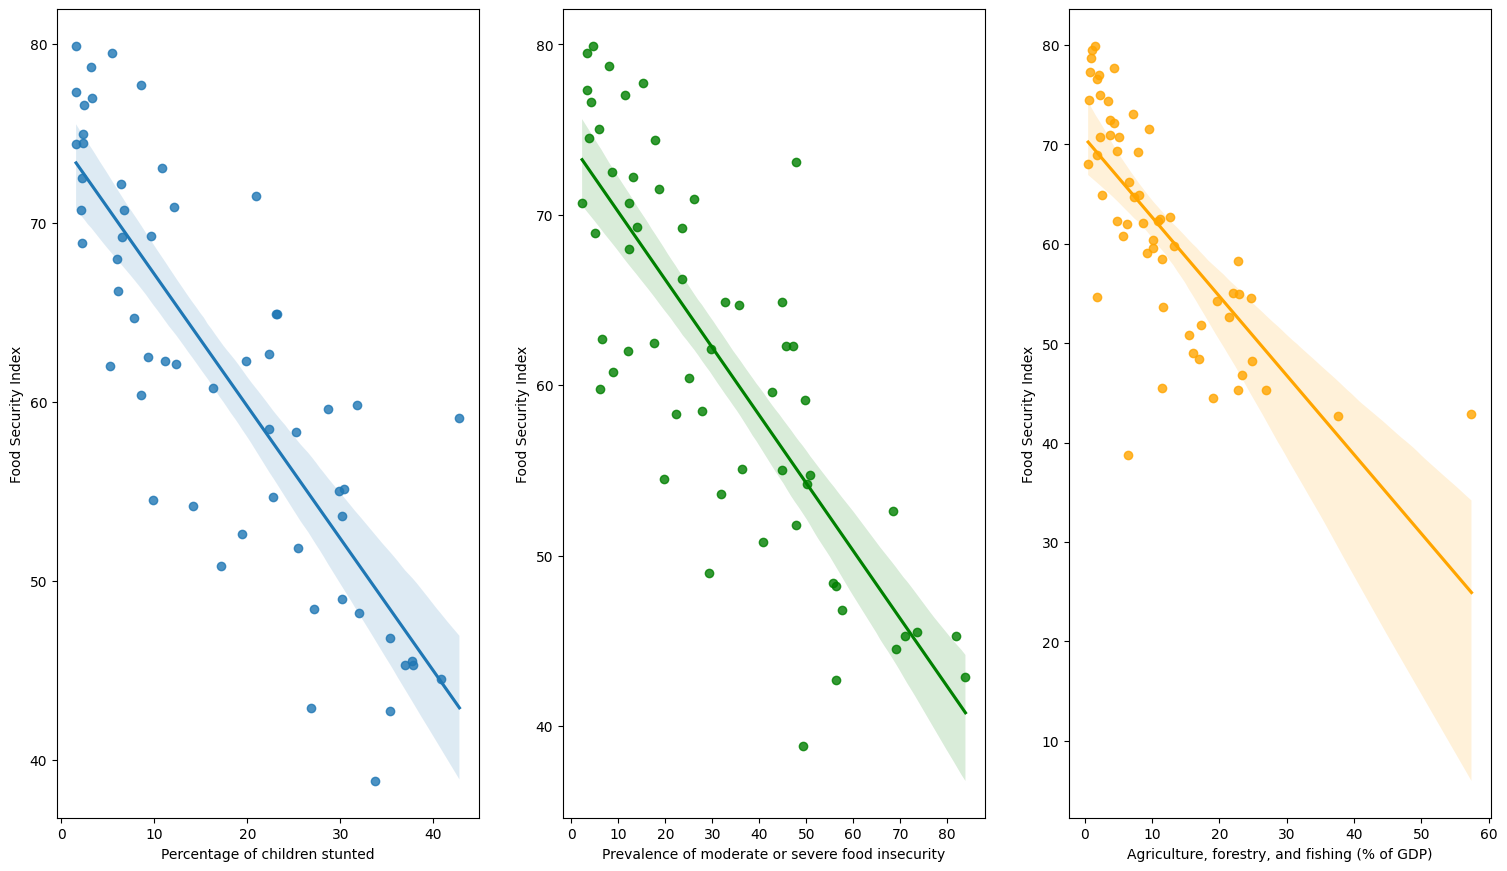

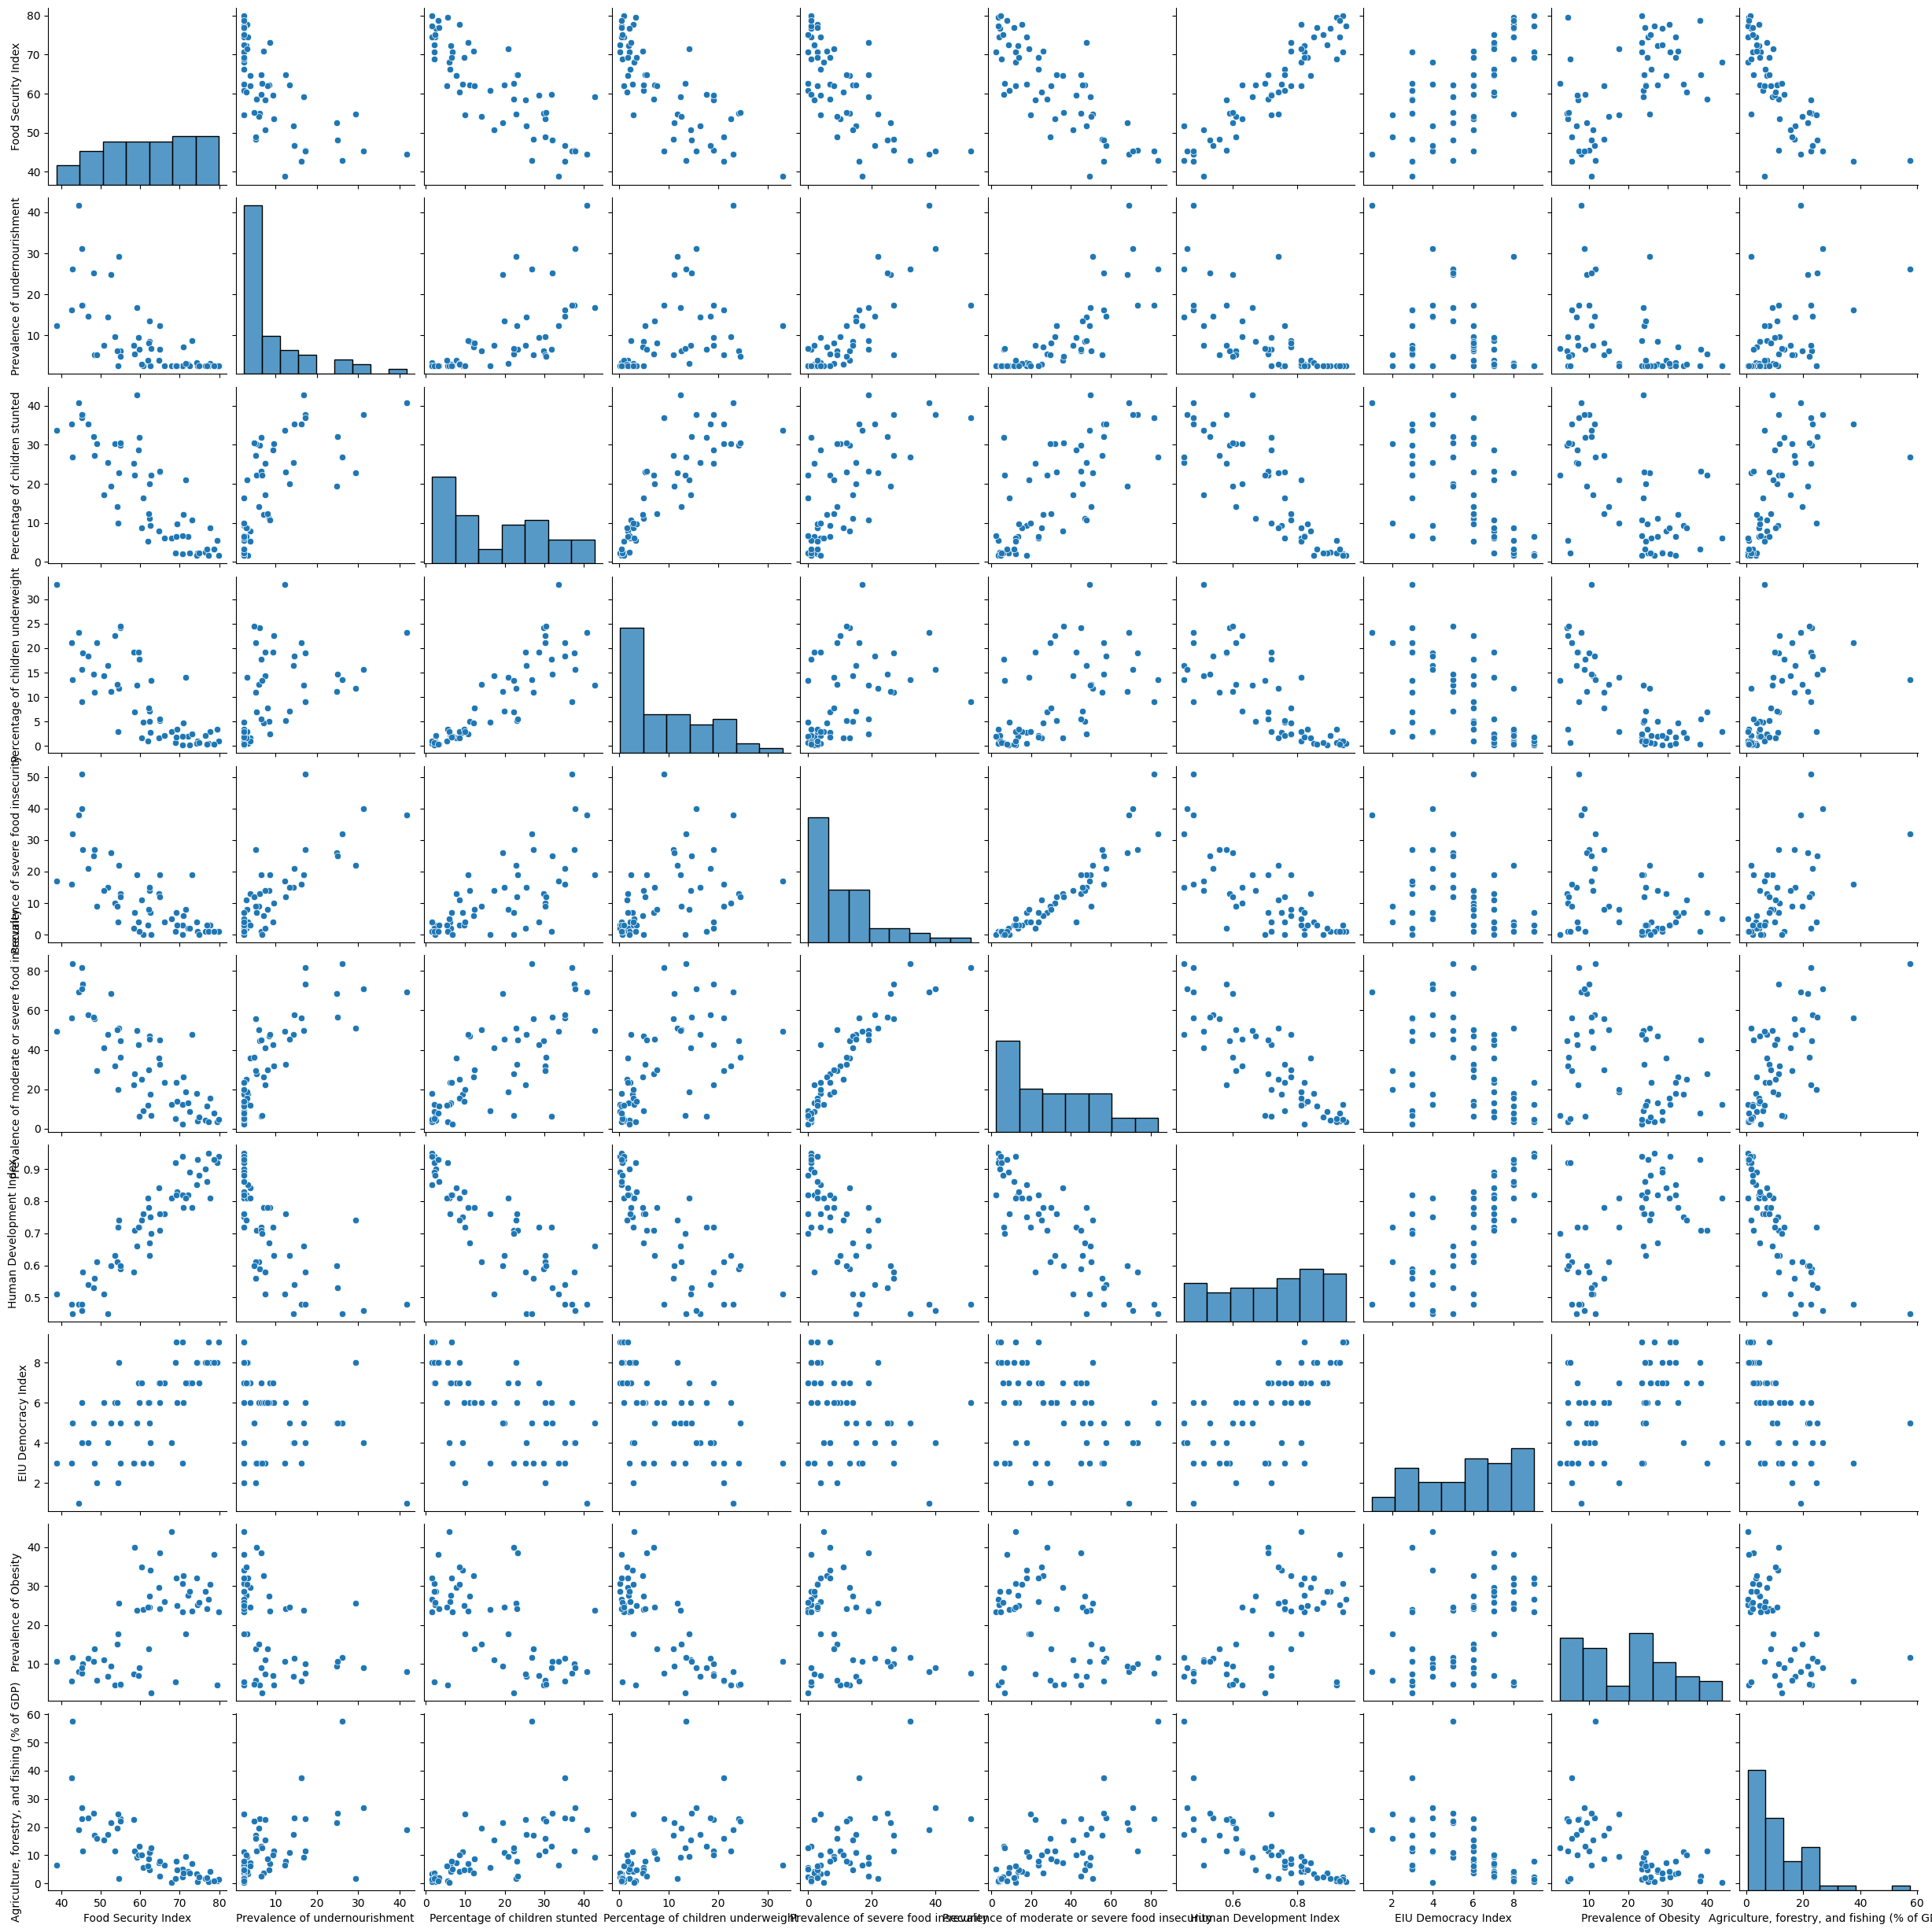

In [ ]:
# Visualization with analysis

# Create subplots
fig, axs = plt.subplots(ncols = 3)

# Enlarge figure
fig.set_size_inches(18.5, 10.5)

# Create regression plots for the independent variable against each dependent variable
df_plot_stunted = sns.regplot(x = 'Percentage of children stunted', data = df, y = 'Food Security Index', ax = axs[0])
df_plot_modsev = sns.regplot(x = 'Prevalence of moderate or severe food insecurity',data=df, y='Food Security Index', ax = axs[1], color = 'green')
df_plot_gdp = sns.regplot(x = 'Agriculture, forestry, and fishing (% of GDP)', data=df, y ='Food Security Index', ax = axs[2], color = 'orange')

# Using a pairplot to verify any multi collinearity between independant variables
df_pplot = sns.pairplot(data = df)

Interpretation:

The pairplot confirms the modelling uncertainty report giving us our 3 Features:

1. Percentage of children stunted,

2. Prevalence of moderate or severe food insecurity,

3. Agriculture, forestry, and fishing (% of GDP)

and our Target:

1. Food Security Index

### Features and Target Preparation

Preparing of features and target for model training.

In [ ]:
# importing from cohort and homework sessions
# Gradient descent linear regression function
def gradient_descent_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray,
                            alpha: float, num_iters: int) -> tuple[np.ndarray, np.ndarray]:
    # Initialize cost array
    J_storage = []
    y_len = len(y)

    # Compute summation part of the function
    for iters in range(num_iters):

        # Calculate linear regression
        X_b = calc_linreg(X,beta)

        # Calculate beta
        beta = beta - ((np.matmul(X.T, X_b - y)) * (alpha)) / float(y_len)

        # Call compute_cost_linreg and add the result to the array
        J_storage.append(compute_cost_linreg(X, y, beta))

    # Convert to numpy array
    J_storage = np.array(J_storage)

    return beta, J_storage

# Predict linear regression function
def predict_linreg(array_feature: np.ndarray, beta: np.ndarray,
                   means: Optional[np.ndarray]=None,
                   stds: Optional[np.ndarray]=None) -> np.ndarray:
    # Handle None for means and stds
    if means is None:
        means = np.mean(array_feature)
    if stds is None:
        stds = np.std(array_feature)

    # Normalize using Z normalization
    norm_array,_,_ = normalize_z(array_feature, means, stds)

    # Prepare normalized array
    prep_array = prepare_feature(norm_array)

    return calc_linreg(prep_array, beta)

def normalize_z(array: np.ndarray,
                columns_means: Optional[np.ndarray]=None,
                columns_stds: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    # Handle None for columns_means and columns_stds
    if columns_means is None:
        # If None, calculate mean from the given array
        columns_means = np.mean(array, axis = 0)

    if columns_stds is None:
        # If None, calculate stds from the given array
        columns_stds = np.std(array, axis = 0)

    # Create array that matches the shape of array
    out = np.ones(array.shape)

    # Filling "out" array with normalized values
    if array.ndim == 1:
        # If array dimension = 1
        for i in range(len(array)):
            out[i] = array[i] - columns_means[i]
            out[i] = out[i] / columns_stds[i]
    else:
        # Otherwise
        for i in range(len(array)):
            out[i] = array[i] - columns_means
            out[i] = out[i] / columns_stds

    return out, columns_means, columns_stds

def get_features_targets(df: pd.DataFrame,
                         feature_names: list[str],
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    # Get respective columns of stated names
    df_feature=df[feature_names]
    df_target=df[target_names]

    return df_feature, df_target

def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
    # Get length of feature
    feat_len = len(np_feature)

    # Create array of ones with the same column size
    one_arr = np.ones((feat_len, 1))

    # Concatenate to feature
    new_feature = np.concatenate((one_arr,np_feature), 1)

    return new_feature

def calc_linreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    # Calculate linear regression
    return np.matmul(X, beta)

def compute_cost_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    # Get length of X
    X_len = len(X)

    # Calculate cost function
    cost_linreg = (np.sum((calc_linreg(X,beta) - y) ** 2)) * 1 / (2 * X_len)

    # Remove any single dimension entries from shape of cost_linreg
    return np.squeeze(cost_linreg)

def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame,
               random_state: Optional[int]=None,
               test_size: float=0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    # Generate random seed
    np.random.seed(random_state)

    # Get random indexes
    indexes= np.random.choice(df.shape[0], int(df.shape[0] * test_size), replace=False)

    # Split data into training and testing data sets according to the indexes for both feature and target data sets
    df_feature_test=df_feature.iloc[indexes,:]
    df_target_test=df_target.iloc[indexes,:]
    df_feature_train=df_feature.drop(indexes)
    df_target_train=df_target.drop(indexes)

    return df_feature_train, df_feature_test, df_target_train, df_target_test

def r2_score(y: np.ndarray, ypred: np.ndarray) -> float:
    # Calculate residual sum of squares
    ss_res = np.sum((y - ypred)** 2)

    # Calculate total sum of squares
    ss_tot = np.sum((y - np.mean(y))** 2)

    # Calculate and return R²
    return 1 - (ss_res/ ss_tot)

def mean_squared_error(target: np.ndarray, pred: np.ndarray) -> float:
    # Calculate and return mean squared error
    return np.sum((target - pred)** 2) / target.size

def build_model_linreg(df_feature_train: pd.DataFrame,
                       df_target_train: pd.DataFrame,
                       beta: Optional[np.ndarray] = None,
                       alpha: float = 0.01,
                       iterations: int = 1500) -> tuple[dict[str, Any], np.ndarray]:

  # Step 0: Initialize beta if not provided
    if beta is None:
        beta = np.zeros((df_feature_train.shape[1] + 1, 1))  # Initialize with zeros
    assert beta.shape == (df_feature_train.shape[1] + 1, 1)  # Validate shape

    # Step 1: Convert DataFrames to NumPy arrays
    features = df_feature_train.to_numpy()
    target = df_target_train.to_numpy().reshape(-1, 1)  # Ensure target is a column vector

    # Step 2: Normalize the features using Z-score normalization
    normalized_features, means, stds = normalize_z(features)

    # Step 3: Create the design matrix X with an intercept term
    m = normalized_features.shape[0]  # Number of training examples
    X = np.hstack((np.ones((m, 1)), normalized_features))  # Add intercept term

    # Step 4: Perform gradient descent to optimize beta
    beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

    # Step 5: Store the learned parameters and normalization details
    model: dict[str, Any] = {
        "beta": beta,   # Learned coefficients
        "means": means, # Means of features (for normalization)
        "stds": stds    # Standard deviations of features (for normalization)
    }

    return model, J_storage

In [ ]:
# putting Python code to prepare your features and target

# Get features and targets from the dataframe
df_feature, df_target = get_features_targets(df, ['Percentage of children stunted',
                                                  'Prevalence of moderate or severe food insecurity',
                                                  'Agriculture, forestry, and fishing (% of GDP)'],
                                                   ['Food Security Index'])

# Split the data into training and test data sets, we chose seed 42 because of the movie "The Hitchhiker's Guide to the Galaxy"
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target,
                                                                                random_state=42, test_size=0.3)

# Normalize the feature using z normalization
array_feature_train_z, means, stds = normalize_z(df_feature_train.to_numpy())

# Preparation for the feature and target data sets
X: np.ndarray = prepare_feature(array_feature_train_z)
target: np.ndarray = df_target_train.to_numpy()


### Building Model

Use python code to build your model. Give explanation on this process.

In [ ]:
# Define the number of iterations and regularization parameter alpha for model training
iterations = 2000  # Number of iterations to run during model training
alpha = 0.5  # Regularization parameter to control the strength of regularization

# Build the linear regression model using the defined number of iterations and alpha value
# The function 'build_model_linreg' trains a linear regression model and returns the model and a storage of cost values at each iteration
model, J_storage = build_model_linreg(df_feature_train, df_target_train, alpha=alpha, iterations=iterations)

# Extract the model parameters (beta coefficients) and statistics (means, standard deviations)
beta = model["beta"]  # Coefficients for the linear regression model (including the intercept)
means = model["means"]  # Mean values of the features used for standardization
stds = model["stds"]  # Standard deviation values of the features used for standardization

# Include the column names from the training dataset and "Intercept" as the first element in the list of column names
# This will match the model's beta values to the correct features
column_names = ["Intercept"] + list(df_feature_train.columns)  # Column names with "Intercept" added for the bias term

# Combine the column names with the corresponding beta values (flattened) into a list of tuples for easy display
beta_with_names = list(zip(column_names, beta.flatten()))  # Pair each column name with its corresponding beta value

# Print the beta values (coefficients) for each feature, including the intercept
print("Beta Values:")
for name, value in beta_with_names:  # Iterate through each feature name and its corresponding beta value
    print(f"{name}: {value}")  # Print the feature name and its associated beta value

Beta Values:
Intercept: 61.202439024390245
Percentage of children stunted: -5.345757486062727
Prevalence of moderate or severe food insecurity: -4.001471007639368
Agriculture, forestry, and fishing (% of GDP): -2.9377305873623665


### Evaluating the Model

- Describing the metrics of our choice
- Evaluating our model's performance

In [ ]:
# Convert the test feature data (df_feature_test) into a NumPy array for model prediction
array_feature_test = df_feature_test.to_numpy()  # Convert test features into a NumPy array for easier manipulation

# Make predictions using the trained linear regression model
# The function 'predict_linreg' uses the test data (array_feature_test), the learned beta coefficients, means, and stds
# to generate predictions for the target variable
pred = predict_linreg(array_feature_test, beta, means, stds)

# Evaluate the model performance by calculating R² (coefficient of determination) and MSE (Mean Squared Error)

# Convert the test target data (df_target_test) into a NumPy array
target = df_target_test.to_numpy()  # Convert actual target values from the test set into a NumPy array

# Calculate R² value to measure how well the model's predictions match the actual target values
# R² indicates the proportion of variance explained by the model
r2_value = r2_score(target, pred)  # R² value is calculated using the actual and predicted values
print("R2 Value:", r2_value)  # Output the R² value

# Calculate the Mean Squared Error (MSE) to quantify the average squared difference between predicted and actual values
mse = mean_squared_error(target, pred)  # MSE gives an indication of the average prediction error
print("Mean Squared Error:", mse)  # Output the MSE value


R2 Value: 0.7142123174030865
Mean Squared Error: 17.23833723805417


### Improving the Model

- Improving the models by performing any data processing techniques or hyperparameter tuning.
- Showing the improvement as compared to the previous performance

Note:
- We did not change or add dataset at this step
- We are allowed to use libraries such as sklearn for data processing (NOT for building model)
- We made sure to have the same test dataset so the results are comparable with the previous model
- We performed hyperparameter tuning, and split the training data further into train and validation dataset

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def hyperparameter_tuning():
    # Generate alphas on a logarithmic scale and iterations range
    alphas = np.logspace(-3, 0, 10)  # Alphas: 0.001 to 1 in logarithmic steps
    iterations_list = range(1000, 2500, 100)  # Iterations: 1000 to 2400 (step size: 100)

    # Initialize variables to store the best results during tuning
    best_r2 = -float('inf')  # Start with the worst possible R² (lowest value)
    best_alpha = None  # Best learning rate (alpha)
    best_iterations = None  # Best number of iterations for gradient descent
    best_beta = None  # Best model parameters (beta coefficients)

    # Prepare training data (normalized features)
    X_train: np.ndarray = prepare_feature(array_feature_train_z)  # Normalize and prepare the training features
    target_train: np.ndarray = df_target_train.to_numpy()  # Convert the target values for training to numpy array

    # Prepare testing data (use the same test set for final evaluation)
    array_feature_test_z, _, _ = normalize_z(df_feature_test.to_numpy(), means, stds)  # Normalize the test features
    X_test: np.ndarray = prepare_feature(array_feature_test_z)  # Normalize and prepare the test features
    target_test: np.ndarray = df_target_test.to_numpy()  # Convert the target values for testing to numpy array

    # Loop through the hyperparameter combinations (alphas and iterations)
    for alpha in alphas:  # Loop through different learning rates (alphas)
        for iterations in iterations_list:  # Loop through different iteration values for gradient descent
            # Initialize beta (model parameters) as zeros
            beta = np.zeros((X_train.shape[1], 1))  # Start with a zero vector of parameters

            # Train the model using gradient descent
            # 'gradient_descent_linreg' function returns updated beta and the cost history (J_storage)
            beta, J_storage = gradient_descent_linreg(X_train, target_train, beta, alpha, iterations)

            # Make predictions on the test data using the trained model
            pred = calc_linreg(X_test, beta)  # Predict values on the test set using the trained beta

            # Compute R² score (coefficient of determination) to evaluate the model's performance
            r2 = r2_score(target_test, pred)  # R² measures how well the predictions match the actual test values

            # If the current model performs better, store the results
            if r2 > best_r2:  # Compare current R² with the best found so far
                best_r2 = r2  # Update best R²
                best_alpha = alpha  # Store the current alpha
                best_iterations = iterations  # Store the current iterations
                best_beta = beta  # Store the current model parameters

    # Return the best hyperparameters and the corresponding model parameters
    return best_alpha, best_iterations, best_r2, best_beta

# Call the hyperparameter tuning function with the fixed training and test data
# It will return the best hyperparameters (alpha, iterations) and the corresponding best model parameters (beta)
best_alpha, best_iterations, best_r2, best_beta = hyperparameter_tuning()

# Print the best combination of hyperparameters
print(f"\nBest Alpha: {best_alpha}, \nBest Iterations: {best_iterations}, \nBest R²: {best_r2} \n")


Best Alpha: 0.0021544346900318843, 
Best Iterations: 1900, 
Best R²: 0.7293514071390349 



**Why we used Cross-Validation below**

Small Datasets: Cross-validation helps maximize the use of limited data by ensuring each data point is used for both training and testing.

Model Selection and Hyperparameter Tuning: It helps find the best model or hyperparameters by evaluating performance across different data splits.

Avoid Overfitting: It helps reduce overfitting by training and testing on different subsets of the data.

**How It Applies to Our Case:**

Dataset Splitting: Cross-validation allows us to train and test the model on multiple data subsets, which is crucial when dealing with a small dataset.

Hyperparameter Tuning: We use cross-validation to test different hyperparameters, ensuring that the model generalizes well across various splits of the data.

Evaluating Performance: Cross-validation provides a more reliable measure of model performance by averaging results from multiple train-test splits.

In short, cross-validation helps ensure that our model is robust, reduces overfitting, and provides a reliable performance estimate when working with a small dataset.

Source: https://www.datacamp.com/tutorial/k-fold-cross-validation (we also used this link to create our cross-validation function below)

In [ ]:
from sklearn.model_selection import KFold

def cross_validate_linreg_with_kfold(df_features: pd.DataFrame,
                                     df_target: pd.DataFrame,
                                     k: int = 5,  # Number of folds for cross-validation
                                     alpha: float = 0.01,  # Learning rate for gradient descent
                                     iterations: int = 1500,  # Number of iterations for gradient descent
                                     repeats: int = 3) -> dict:  # Number of times to repeat the k-fold cross-validation

    # Initialize KFold with 'k' splits, shuffling the data before splitting
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize a dictionary to store R² and MSE results for each fold
    fold_results = {fold: {"R2": [], "MSE": []} for fold in range(1, k + 1)}

    # Loop over the number of repeats to perform repeated k-fold cross-validation
    for repeat in range(repeats):
        # Loop through each fold in the k-fold cross-validation
        for fold_num, (train_index, test_index) in enumerate(kf.split(df_features), 1):
            # Split the data into training and testing sets based on the current fold
            df_feature_train, df_target_train = (
                df_features.iloc[train_index],
                df_target.iloc[train_index],
            )
            df_feature_test, df_target_test = (
                df_features.iloc[test_index],
                df_target.iloc[test_index],
            )

            # Train the model using gradient descent
            model, _ = build_model_linreg(df_feature_train, df_target_train, alpha=alpha, iterations=iterations)

            # Extract model parameters (beta coefficients, means, and standard deviations)
            beta = model["beta"]
            means = model["means"]
            stds = model["stds"]

            # Convert test features to a NumPy array and make predictions
            array_feature_test = df_feature_test.to_numpy()
            pred = predict_linreg(array_feature_test, beta, means, stds)

            # Convert test target values to a NumPy array and calculate R² and MSE
            target = df_target_test.to_numpy()
            r2_value = r2_score(target, pred)  # R²: measures model fit
            mse = mean_squared_error(target, pred)  # MSE: measures model error

            # Store the R² and MSE results for the current fold in the repeat
            fold_results[fold_num]["R2"].append(r2_value)
            fold_results[fold_num]["MSE"].append(mse)

    # Calculate the average and standard deviation of R² and MSE for each fold across repeats
    avg_r2 = {fold: np.mean(results["R2"]) for fold, results in fold_results.items()}
    std_r2 = {fold: np.std(results["R2"]) for fold, results in fold_results.items()}
    avg_mse = {fold: np.mean(results["MSE"]) for fold, results in fold_results.items()}
    std_mse = {fold: np.std(results["MSE"]) for fold, results in fold_results.items()}

    # Identify the fold with the highest average R²
    best_fold_r2 = max(avg_r2, key=avg_r2.get)
    best_r2 = avg_r2[best_fold_r2]

    # Return the results as a dictionary
    return {
        "Fold Results": fold_results,
        "Average R2": avg_r2,
        "Std R2": std_r2,
        "Average MSE": avg_mse,
        "Std MSE": std_mse,
        "Best Fold R2": best_fold_r2,
        "Best R2": best_r2,
    }

# Example usage: perform cross-validation with k=5 folds, repeating 50 times, using the best hyperparameters
cv_results = cross_validate_linreg_with_kfold(df_feature, df_target, k=5, alpha=best_alpha, iterations=best_iterations, repeats=50)

# Print the results for each fold
for fold_num in range(1, 6):  # Loop through the number of folds (here k=5)
    print(f"\nFold {fold_num}:")
    print(f"  Average R2: {cv_results['Average R2'][fold_num]:.4f}")
    print(f"  Average MSE: {cv_results['Average MSE'][fold_num]:.4f}")

# Print the best fold based on R2
print(f"\nBest Fold based on R2: {cv_results['Best Fold R2']} with R2: {cv_results['Best R2']:.4f}")



Fold 1:
  Average R2: 0.6946
  Average MSE: 16.8361

Fold 2:
  Average R2: 0.6438
  Average MSE: 37.7001

Fold 3:
  Average R2: 0.4274
  Average MSE: 63.3867

Fold 4:
  Average R2: 0.8409
  Average MSE: 25.2480

Fold 5:
  Average R2: 0.9465
  Average MSE: 7.4254

Best Fold based on R2: 5 with R2: 0.9465


Now that we have the best fold, lets test to see how it peforms compared to our original model.

In [ ]:
def test_specific_fold(df_features: pd.DataFrame,
                       df_target: pd.DataFrame,
                       fold_number: int,
                       k: int = 5,
                       alpha: float = 0.01,
                       iterations: int = 1500) -> dict:
    # Initialize KFold cross-validation with k splits
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Iterate through each fold in the k-fold cross-validation
    for fold_num, (train_index, test_index) in enumerate(kf.split(df_features), 1):
        # Check if the current fold is the one we want to test
        if fold_num == fold_number:
            # Split the data into training and testing sets based on the current fold indices
            df_feature_train, df_target_train = df_features.iloc[train_index], df_target.iloc[train_index]
            df_feature_test, df_target_test = df_features.iloc[test_index], df_target.iloc[test_index]

            # Train the model using the specified alpha and number of iterations
            model, _ = build_model_linreg(df_feature_train, df_target_train, alpha=alpha, iterations=iterations)

            # Extract model parameters such as beta, means, and standard deviations
            beta = model["beta"]
            means = model["means"]
            stds = model["stds"]

            # Use the trained model to make predictions on the test data of the chosen fold
            array_feature_test = df_feature_test.to_numpy()
            predictions = predict_linreg(array_feature_test, beta, means, stds)

            # Evaluate the model performance on the test data of the selected fold
            target = df_target_test.to_numpy()
            r2_value = r2_score(target, predictions)  # Calculate R² (coefficient of determination)
            mse_value = mean_squared_error(target, predictions)  # Calculate Mean Squared Error (MSE)

            # Return evaluation metrics for this fold (R², MSE, and model parameters)
            return {
                "Fold": fold_number,  # Return the fold number
                "R2": r2_value,       # Return R² value for the fold
                "MSE": mse_value,     # Return MSE value for the fold
                "Beta": beta.flatten()  # Return the model coefficients (Beta) flattened as a 1D array
            }

# Call the function to evaluate the specific fold based on the best fold from cross-validation
result = test_specific_fold(df_feature, df_target, fold_number=int(cv_results['Best Fold R2']), alpha = best_alpha, iterations = best_iterations)

# Print the results for the specified fold
print(f"Results for Fold {result['Fold']}:")
print(f"R2: {result['R2']}")
print(f"MSE: {result['MSE']}")
print(f"Beta values: {result['Beta']}")


Results for Fold 5:
R2: 0.9464818069695106
MSE: 7.425441402395905
Beta values: [61.42012344 -4.48436821 -3.00861528 -3.14642046]


### Discussion and Analysis

- Analyzing the results of our metrics.
- Explaining how does our analysis and machine learning help to solve our problem statement.
- Conclusion

####**Initial Model Evaluation:**

The initial model regression results show that the predictors (children stunted, food insecurity, and agriculture's share in GDP) **have significant inverse relationships with the Food Security Index (FSI)**, as indicated by the negative beta values. Specifically:

The intercept is 61.20, representing the baseline FSI when all predictors are zero.

The negative beta values for the predictors suggest that **higher levels of stunting, food insecurity, and agriculture's share in GDP are associated with lower FSI.**

R² Value (0.71): This indicates that approximately 71% of the variance in the FSI is explained by the model, which is a solid fit, though some room for improvement remains.

Mean Squared Error (17.24): The MSE is lower than the previous model, indicating improved accuracy in predictions.

####**Hyperparameter Testing:**

Hyperparameter testing led to the discovery of the best configuration, with:

**(i) Best Alpha: 0.00215**

**(ii) Best Iterations: 1900**

**(iii) Best R²: 0.7294**

The best alpha indicates a moderate level of regularization, which helps prevent overfitting while still allowing the model to capture important patterns in the data. The R² value remains relatively stable at 0.7294, indicating that this configuration leads to a model that generalizes well.

####**Cross Validation Results:**

The cross-validation process yielded the following results across different folds:

*   Fold 1 (0.6946 R²): A moderate R² value, showing reasonable predictive accuracy.

*   Fold 2 (0.6438 R²): Lower performance, indicating some variability across the data splits.

*   Fold 3 (0.4274 R²): A notably lower R², suggesting that this fold presented a more challenging dataset for the model.

*   Fold 4 (0.8409 R²): Strong performance with a high R², indicating good model accuracy.

*   Fold 5 (0.9465 R²): Exceptional performance with an R² value near 0.95, suggesting that this fold provided the best dataset for model fitting.
The best fold based on R² was Fold 5, with an outstanding R² of 0.9465 and a low MSE of 7.43, reflecting excellent predictive performance.

####**Fold Testing:**

Testing on the best fold (Fold 5) produced the following results:

* R²: 0.9465

* MSE: 7.43

The R² value of 0.9465 confirms the model's strong fit for this particular data subset. The low MSE suggests that the model’s predictions are highly accurate, with minimal error. The beta values for this fold are:

* Intercept: 61.42

* Percentage of children stunted: -4.48

* Prevalence of moderate or severe food insecurity: -3.01

* Agriculture, forestry, and fishing (% of GDP): -3.15

These values further support the inverse relationship between the predictors and the FSI.

####**How Analysis and Machine Learning Help Solve the Problem Statement:**

This machine learning approach provides a deeper understanding of the factors that influence food security, by quantifying the relationships between key economic, health, and agricultural indicators and the Food Security Index (FSI). The model highlights that:

1. Children stunted and food insecurity are both key drivers of low food security.

2. Agriculture’s share in GDP also has a negative effect on FSI, suggesting that economies with lower agricultural output relative to GDP may face greater food security challenges.

3. The model helps policymakers by providing a clear framework to identify the most influential factors contributing to food insecurity. For example, targeted interventions to reduce stunting or food insecurity could help improve food security outcomes.

4. The model's predictive capability allows for forecasting the FSI based on current and projected values of the predictors.

The use of hyperparameter tuning and cross-validation ensures that the model is both accurate and robust. The cross-validation results, especially from Fold 5, demonstrate the model's strong generalizability and its ability to handle different data splits effectively.

####**Conclusion**

The model’s results suggest that it is highly effective in identifying the main drivers of food security and making reliable predictions. The strong performance of Fold 5 (R² = 0.9465) demonstrates the potential of this approach to accurately estimate food security levels. While the model's R² varies slightly across folds, the overall performance is solid, with an R² of 0.71 and a reduced MSE of 17.24 for the initial model, improving further with cross-validation.

Further refinement of the model, such as incorporating additional variables or testing other machine learning techniques, could enhance its performance even more. Nonetheless, this model already provides valuable insights into food security dynamics, enabling better-informed decisions for policymakers aiming to improve food security outcomes globally.